In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
holidays_events = pd.read_csv('Data/holidays_events.csv')
oil = pd.read_csv('Data/oil.csv')
stores = pd.read_csv('Data/stores.csv')
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')
transactions = pd.read_csv('Data/transactions.csv')

In [33]:
holidays_events["date"] = pd.to_datetime(holidays_events.date)
oil["date"] = pd.to_datetime(oil.date)
test["date"] = pd.to_datetime(test.date)
train["date"] = pd.to_datetime(train.date)
transactions["date"] = pd.to_datetime(transactions.date)

In [34]:
oil['dcoilwtico'].fillna(np.nanmedian(oil.dcoilwtico), inplace = True)
oil.head(3)

,date,dcoilwtico
0,2013-01-01,53.190
1,2013-01-02,93.140
2,2013-01-03,92.970


In [35]:
stores.head(3)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


In [36]:
train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0


In [37]:
test.head(3)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


In [38]:
transactions.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

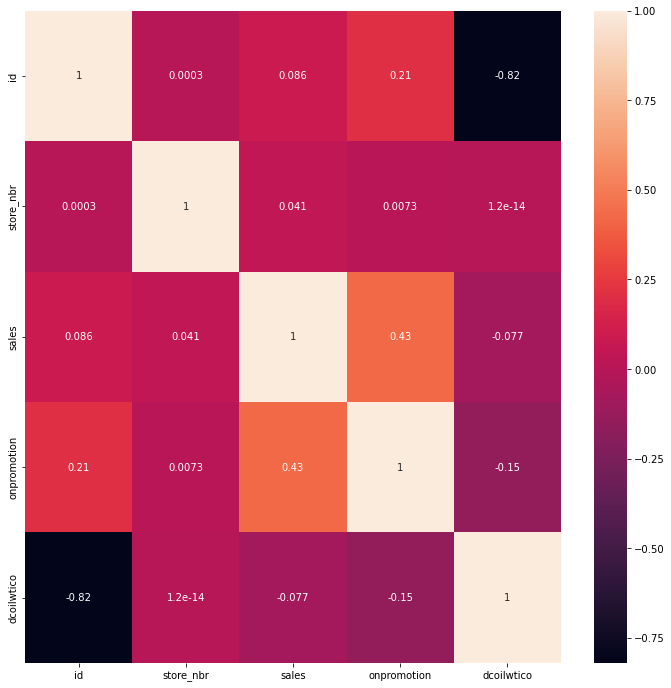

In [39]:
plt.figure(figsize=(12, 12))
train_oil = pd.merge(train, oil, how='left')
sns.heatmap(train_oil.corr(), annot=True)
plt.plot

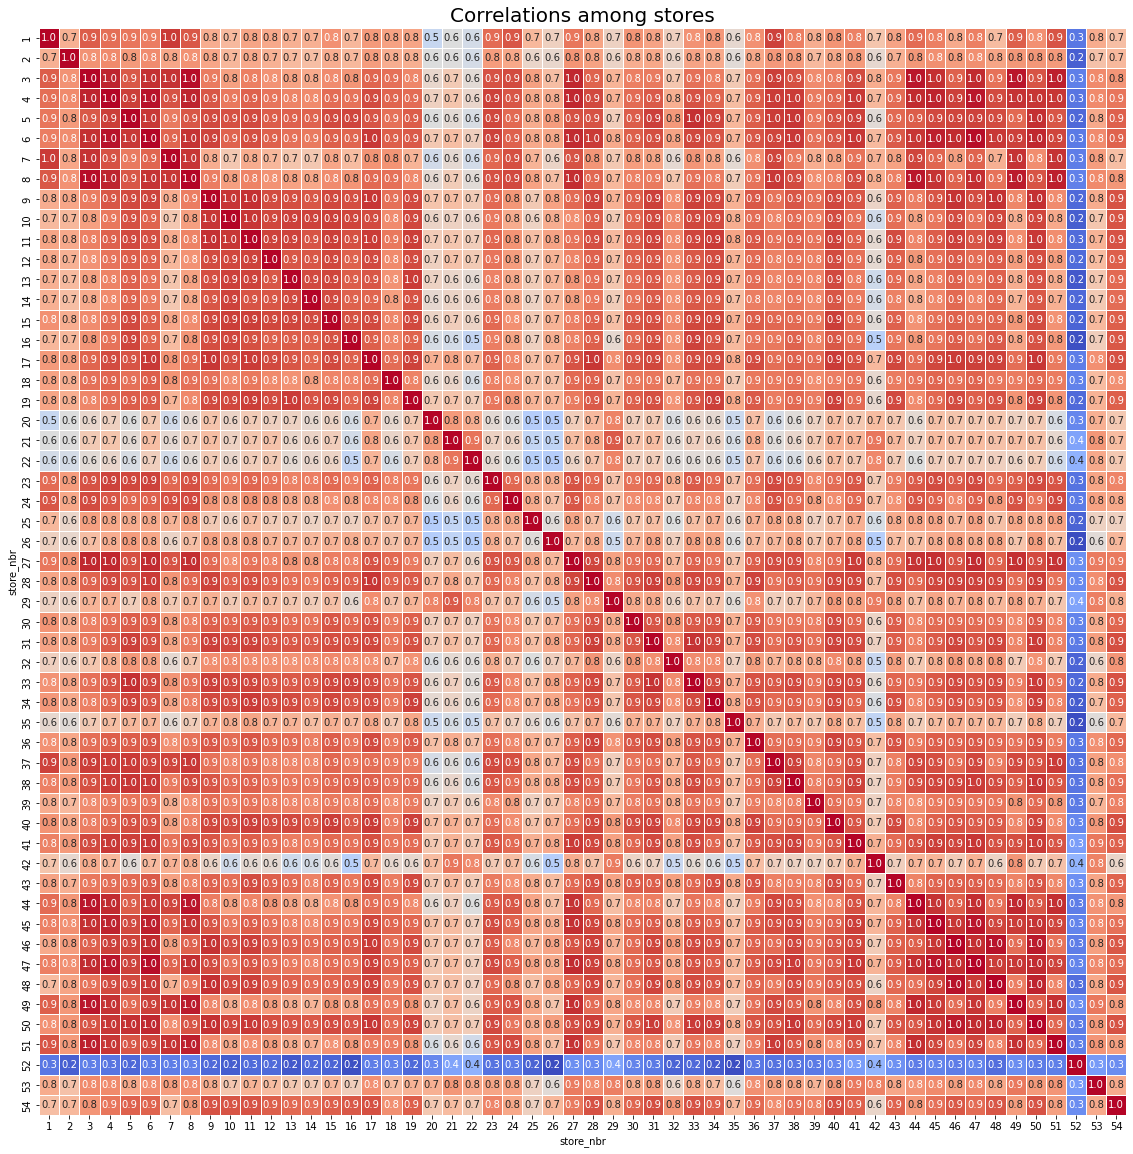

In [40]:
a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
# mask = np.triu(a.corr())
# mask
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

In [41]:
train.shape

(3000888, 6)

In [42]:
train = train[~((train.store_nbr == 52) & (train.date < "2017-04-20"))]
train = train[~((train.store_nbr == 22) & (train.date < "2015-10-09"))]
train = train[~((train.store_nbr == 42) & (train.date < "2015-08-21"))]
train = train[~((train.store_nbr == 21) & (train.date < "2015-07-24"))]
train = train[~((train.store_nbr == 29) & (train.date < "2015-03-20"))]
train = train[~((train.store_nbr == 20) & (train.date < "2015-02-13"))]
train = train[~((train.store_nbr == 53) & (train.date < "2014-05-29"))]
train = train[~((train.store_nbr == 36) & (train.date < "2013-05-09"))]
train.shape

(2780316, 6)

In [43]:
sales_dependednt_on_family = train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family","store_nbr"])
sales_dependednt_on_family = sales_dependednt_on_family[sales_dependednt_on_family.sales == 0]
sales_dependednt_on_family

,store_nbr,family,sales
1,1,BABY CARE,0.000
397,13,BABY CARE,0.000
727,23,BABY CARE,0.000
1420,44,BABY CARE,0.000
1453,45,BABY CARE,0.000
1486,46,BABY CARE,0.000
1519,47,BABY CARE,0.000
1552,48,BABY CARE,0.000
1585,49,BABY CARE,0.000
1618,50,BABY CARE,0.000


In [44]:
outer_join = train.merge(sales_dependednt_on_family[sales_dependednt_on_family.sales == 0].drop("sales",axis = 1), how = 'outer', indicator = True)
train = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
del outer_join
train.shape

(2698648, 6)

In [45]:
zero_prediction = []
for i in range(0,len(sales_dependednt_on_family)):
    zero_prediction.append(
        pd.DataFrame({
            "date":pd.date_range("2017-08-16", "2017-08-31").tolist(),
            "store_nbr":sales_dependednt_on_family.store_nbr.iloc[i],
            "family":sales_dependednt_on_family.family.iloc[i],
            "sales":0
        })
    )
zero_prediction = pd.concat(zero_prediction)
del sales_dependednt_on_family
zero_prediction

,date,store_nbr,family,sales
0,2017-08-16,1,BABY CARE,0
1,2017-08-17,1,BABY CARE,0
2,2017-08-18,1,BABY CARE,0
3,2017-08-19,1,BABY CARE,0
4,2017-08-20,1,BABY CARE,0
...,...,...,...,...
11,2017-08-27,54,LAWN AND GARDEN,0
12,2017-08-28,54,LAWN AND GARDEN,0
13,2017-08-29,54,LAWN AND GARDEN,0
14,2017-08-30,54,LAWN AND GARDEN,0


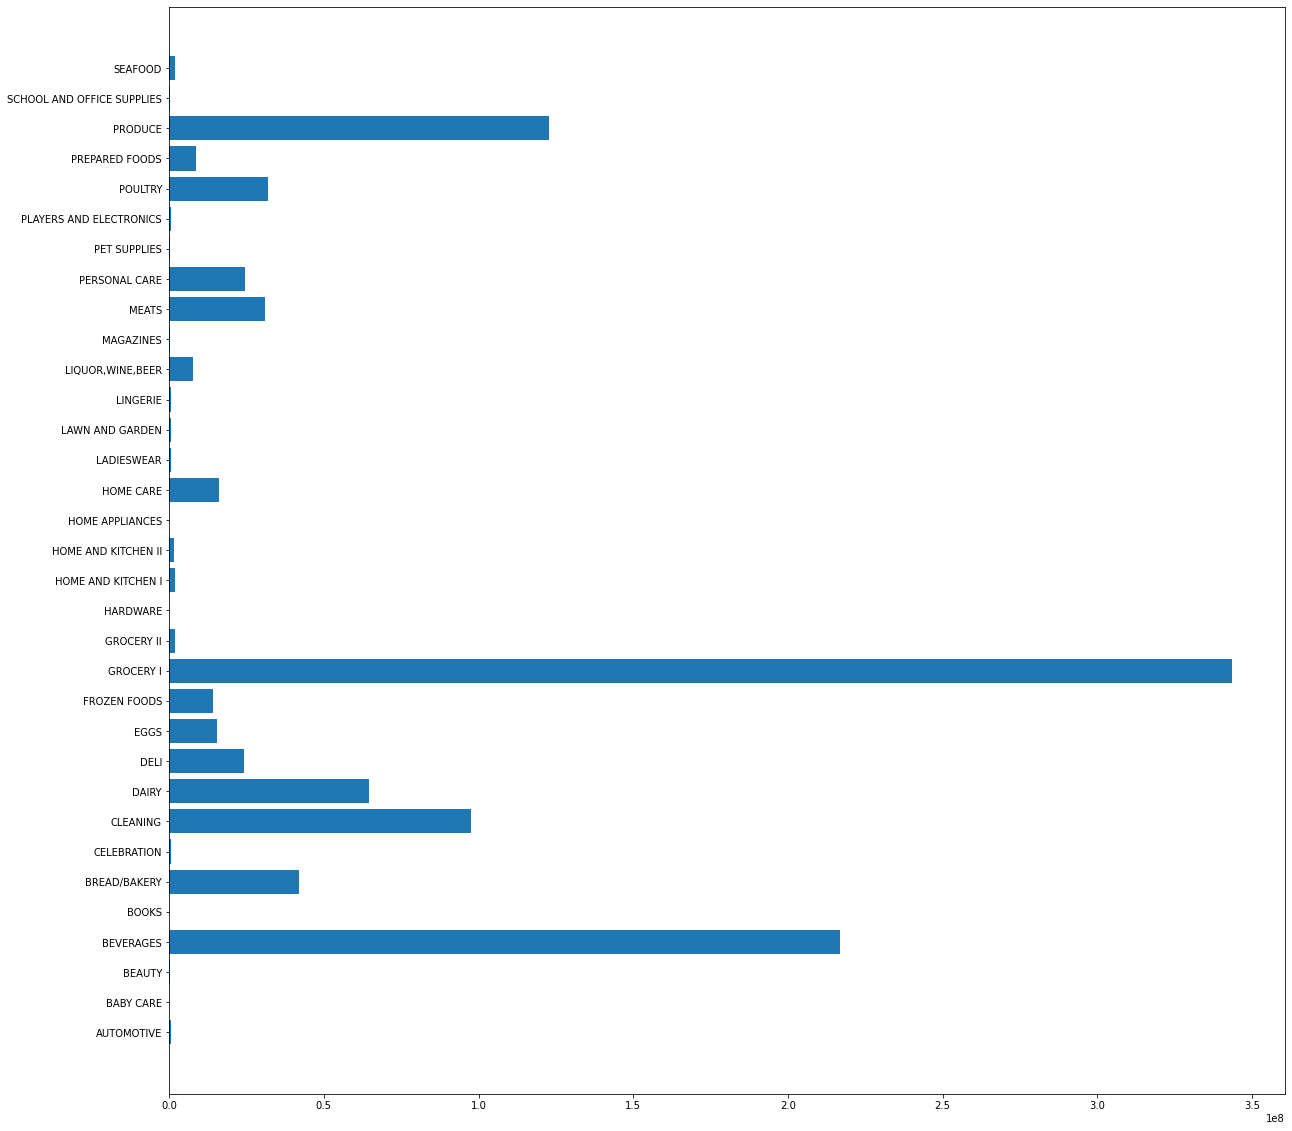

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.figure(figsize=(20, 20))
train_family = train.set_index("date").groupby("family").resample("D").sales.sum().reset_index()
grp_by = train_family.groupby('family')['sales'].sum().reset_index()
plt.barh(grp_by['family'],grp_by['sales'])
plt.show()

In [47]:
train_sales = pd.merge(train, stores)
train_sales["store_nbr"] = train_sales["store_nbr"].astype("int8")
train_sales["year"] = train_sales.date.dt.year

In [48]:
sales_perCity_perYr = train_sales.groupby(["city", "year"]).sales.mean().reset_index()

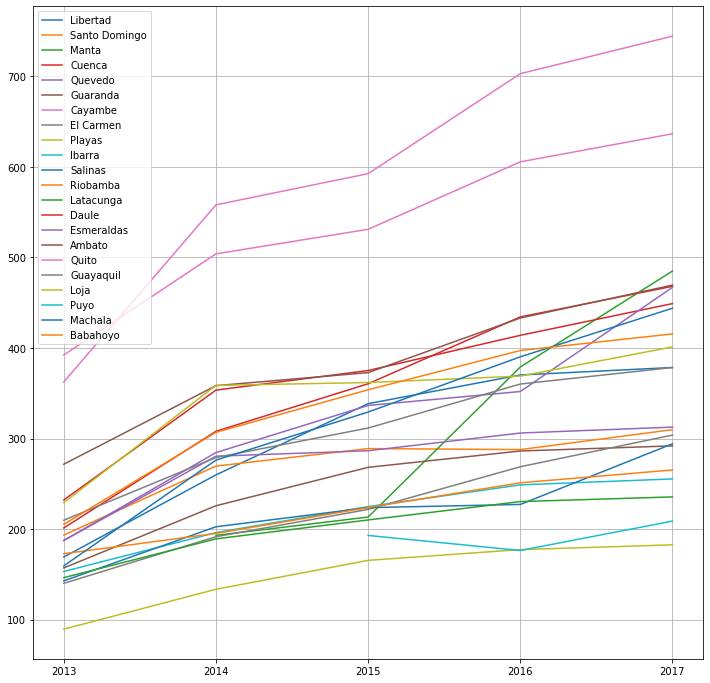

In [49]:
cities = set(sales_perCity_perYr['city'])
plt.figure(figsize=(12, 12))

for city in cities:
     selected_data = sales_perCity_perYr.loc[sales_perCity_perYr['city'] == city]
     plt.plot(selected_data['year'], selected_data['sales'], label=city)

plt.xticks([2013, 2014, 2015, 2016, 2017])
plt.grid()
plt.legend()
plt.show()

In [50]:
train_sales['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [51]:
holidays_events.head(3)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


In [52]:
holidays_events.shape

(350, 6)

In [53]:
holidays_events['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [54]:
# Transferred Holidays
tr1 = holidays_events[(holidays_events.type == "Holiday") & (holidays_events.transferred == True)].drop("transferred", axis = 1).reset_index(drop = True)
tr2 = holidays_events[(holidays_events.type == "Transfer")].drop("transferred", axis = 1).reset_index(drop = True)
transfered_holidays = tr1[['type', 'locale', 'locale_name', 'description']]
transfered_holidays['date'] = tr2['date']
transfered_holidays

,type,locale,locale_name,description,date
0,Holiday,National,Ecuador,Independencia de Guayaquil,2012-10-12
1,Holiday,National,Ecuador,Independencia de Guayaquil,2013-10-11
2,Holiday,National,Ecuador,Independencia de Guayaquil,2014-10-10
3,Holiday,National,Ecuador,Batalla de Pichincha,2016-05-27
4,Holiday,Local,Guayaquil,Fundacion de Guayaquil,2016-07-24
5,Holiday,National,Ecuador,Primer Grito de Independencia,2016-08-12
6,Holiday,National,Ecuador,Primer dia del ano,2017-01-02
7,Holiday,Local,Cuenca,Fundacion de Cuenca,2017-04-13
8,Holiday,National,Ecuador,Batalla de Pichincha,2017-05-26
9,Holiday,National,Ecuador,Primer Grito de Independencia,2017-08-11


In [55]:
holidays = holidays_events[(holidays_events['transferred'] == False) & (holidays_events['type'] != "Transfer")].drop("transferred", axis = 1)
holidays = holidays.append(transfered_holidays).reset_index(drop = True)

In [56]:
holidays

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba
...,...,...,...,...,...
333,2017-04-13,Holiday,Local,Cuenca,Fundacion de Cuenca
334,2017-05-26,Holiday,National,Ecuador,Batalla de Pichincha
335,2017-08-11,Holiday,National,Ecuador,Primer Grito de Independencia
336,2017-09-29,Holiday,Local,Ibarra,Fundacion de Ibarra


In [57]:
holidays["description"] = holidays["description"].str.replace("-", "").str.replace("+", "").str.replace('\d+', '')
holidays["type"] = np.where(holidays["type"] == "Additional", "Holiday", holidays["type"])

In [58]:
holidays["description"] = holidays["description"].str.replace("Puente ", "")
holidays["type"] = np.where(holidays["type"] == "Bridge", "Holiday", holidays["type"])

In [64]:
holidays["type"].unique()

,date,locale,locale_name,description
0,2012-03-02,Local,Manta,Fundacion de Manta
1,2012-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Local,Cuenca,Fundacion de Cuenca


In [60]:
work_day = holidays[holidays.type == "Work Day"]  
holidays = holidays[holidays.type != "Work Day"]  

In [66]:
events = holidays[holidays.type == "Event"].drop(["type", "locale", "locale_name"], axis = 1).rename({"description":"events"}, axis = 1)
holidays = holidays[holidays.type != "Event"].drop("type", axis = 1)
events.head(3)

,date,events
53,2013-05-12,Dia de la Madre
99,2014-05-11,Dia de la Madre
102,2014-06-12,Inauguracion Mundial de futbol Brasil


In [67]:
holidays.head(3)

,date,locale,locale_name,description
0,2012-03-02,Local,Manta,Fundacion de Manta
1,2012-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Local,Cuenca,Fundacion de Cuenca


In [70]:
holidays["locale"].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [71]:
local = holidays[holidays.locale == "Local"].rename({"description":"holiday_local", "locale_name":"city"}, axis = 1).drop("locale", axis = 1).drop_duplicates()
local.head(3)

,date,city,holiday_local
0,2012-03-02,Manta,Fundacion de Manta
2,2012-04-12,Cuenca,Fundacion de Cuenca
3,2012-04-14,Libertad,Cantonizacion de Libertad


In [72]:
national = holidays[holidays.locale == "National"].rename({"description":"holiday_national"}, axis = 1).drop(["locale", "locale_name"], axis = 1).drop_duplicates()
national.head(3)

,date,holiday_national
14,2012-08-10,Primer Grito de Independencia
19,2012-11-02,Dia de Difuntos
20,2012-11-03,Independencia de Cuenca


In [73]:
regional = holidays[holidays['locale'] == "Regional"].rename({"locale_name":"state", "description":"holiday_regional"}, axis = 1).drop("locale", axis = 1).drop_duplicates()
regional.head(3)

,date,state,holiday_regional
1,2012-04-01,Cotopaxi,Provincializacion de Cotopaxi
7,2012-06-25,Imbabura,Provincializacion de Imbabura
21,2012-11-06,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo


In [80]:
df = pd.merge(train.append(test), stores)
df["store_nbr"] = df["store_nbr"].astype("int8")

In [81]:
df.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13
2,3564,2013-01-03,1,AUTOMOTIVE,3.000,0,Quito,Pichincha,D,13


In [82]:
df = pd.merge(df, national, how = "left")
df = pd.merge(df, regional, how = "left", on = ["date", "state"])
df = pd.merge(df, local, how = "left", on = ["date", "city"])

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_national,holiday_regional,holiday_local
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Primer dia del ano,NaN,NaN
1,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,NaN,NaN,NaN
2,3564,2013-01-03,1,AUTOMOTIVE,3.000,0,Quito,Pichincha,D,13,NaN,NaN,NaN


In [84]:
df = pd.merge(df, work_day[["date", "type"]].rename({"type":"IsWorkDay"}, axis = 1),how = "left")

In [85]:
df.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_national,holiday_regional,holiday_local,IsWorkDay
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Primer dia del ano,NaN,NaN,NaN
1,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
2,3564,2013-01-03,1,AUTOMOTIVE,3.000,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN


In [86]:
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    #dummy_na : If true, it will create new column when nan = True
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    df.columns = df.columns.str.replace(" ", "_")
    return df, df.columns.tolist()

In [91]:
events, events_cat = one_hot_encoder(events, nan_as_category=False)